# Tugas Besar Project 1 Pembelajaran Mesin

Muhammad Hasan Syadzily
1301194367 
IF-43-04

# Import Library

In [1]:
import math
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples

# Import Data

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/hasandzily/Project-01_Machine-Learning/main/Dataset/kendaraan_train.csv")
df_raw.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# Eksplorasi dan Persiapan Data

In [4]:
# Drop Data Jenis Kelamin, SIM, Sudah Asuransi, Umur Kendaraan, dan Kendaraan Rusak
df_dropna = df_raw.dropna(how="any")
len(df_dropna)
df_dropna_dropcategorical = df_dropna.drop(axis=1, columns=["Jenis_Kelamin", "SIM", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak"])
df_dropna_dropcategorical.sample(7)

,id,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
107651,107652,64.0,3.0,22922.0,124.0,32.0,0
171452,171453,23.0,41.0,35929.0,152.0,173.0,0
43529,43530,22.0,25.0,36559.0,152.0,112.0,0
264283,264284,60.0,45.0,25737.0,124.0,42.0,0
17827,17828,30.0,29.0,31149.0,26.0,64.0,1
94109,94110,52.0,28.0,36532.0,26.0,93.0,0
206929,206930,63.0,28.0,33056.0,155.0,172.0,0


# Pengecekan Outlier

Text(0.5, 1.0, 'Kanal_Penjualan')

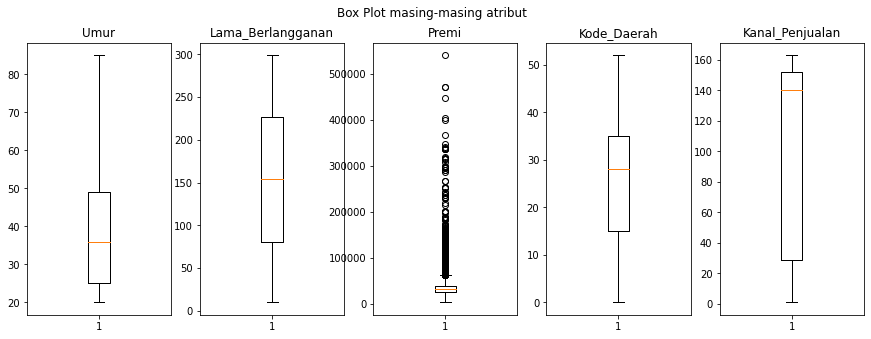

In [6]:
fig, (g1, g2, g3, g4, g5) = plt.subplots(1,5)
fig.suptitle("Box Plot masing-masing atribut")
fig.set_size_inches(15,5)
g1.boxplot(df_dropna_dropcategorical["Umur"])
g1.set_title("Umur")
g2.boxplot(df_dropna_dropcategorical["Lama_Berlangganan"])
g2.set_title("Lama_Berlangganan")
g3.boxplot(df_dropna_dropcategorical["Premi"])
g3.set_title("Premi")
g4.boxplot(df_dropna_dropcategorical["Kode_Daerah"])
g4.set_title("Kode_Daerah")
g5.boxplot(df_dropna_dropcategorical["Kanal_Penjualan"])
g5.set_title("Kanal_Penjualan")

# Men-Drop Outlier Menggunakan Metode IQR

Text(0.5, 1.0, 'Kanal_Penjualan')

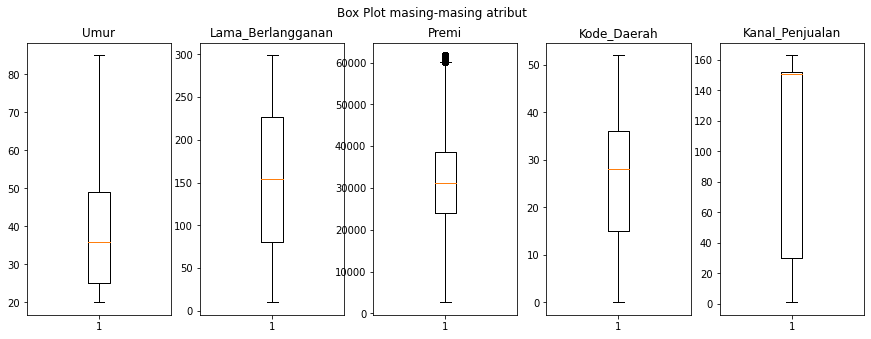

In [7]:
describe = df_dropna_dropcategorical.describe()
describe
iqr_premi = float(describe["Premi"].loc["75%"] - describe["Premi"].loc["25%"])
q1_bound = float(describe["Premi"].loc["25%"]) - (iqr_premi * 1.5)
q2_bound = float(describe["Premi"].loc["75%"]) + (iqr_premi * 1.5)
final_df = df_dropna_dropcategorical.copy()
final_df.reset_index(drop=True, inplace=True)
final_df = final_df[(final_df["Premi"] > q1_bound) & (final_df["Premi"] < q2_bound)]
len(final_df)
fig, (g1, g2, g3, g4, g5) = plt.subplots(1,5)
fig.suptitle("Box Plot masing-masing atribut")
fig.set_size_inches(15,5)
g1.boxplot(final_df["Umur"])
g1.set_title("Umur")
g2.boxplot(final_df["Lama_Berlangganan"])
g2.set_title("Lama_Berlangganan")
g3.boxplot(final_df["Premi"])
g3.set_title("Premi")
g4.boxplot(final_df["Kode_Daerah"])
g4.set_title("Kode_Daerah")
g5.boxplot(final_df["Kanal_Penjualan"])
g5.set_title("Kanal_Penjualan")

# Pengecekan Korelasi

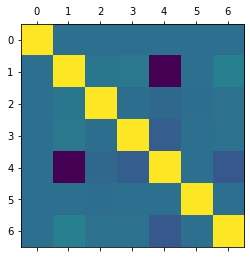

In [8]:
plt.matshow(final_df.corr())
plt.show()

In [9]:
final_df.corr()

,id,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.002691,0.000597,0.002643,-0.001621,0.001875,0.000203
Umur,0.002691,1.000000,0.044503,0.046519,-0.574807,-0.001055,0.108781
Kode_Daerah,0.000597,0.044503,1.000000,-0.004068,-0.044871,-0.003771,0.010484
Premi,0.002643,0.046519,-0.004068,1.000000,-0.105819,0.001831,0.019686
Kanal_Penjualan,-0.001621,-0.574807,-0.044871,-0.105819,1.000000,0.000017,-0.139186
Lama_Berlangganan,0.001875,-0.001055,-0.003771,0.001831,0.000017,1.000000,0.001819
Tertarik,0.000203,0.108781,0.010484,0.019686,-0.139186,0.001819,1.000000


# Pemodelan Data

In [10]:
# Muhammad Hasan Syadzily
# 1301194367

class KMeans:

  point = None
  inersia = None
  training = None
  
  def __init__(self, df: pd.DataFrame):
    # Kelas ini digunakan untuk menyiapkan dataframe yang akan ditraining. Pastikan kolom bernama id atau sejenis sudah di drop tidak termasuk ke dalam dataframe.
    print("K-Means akan ditentukan oleh atribut-atribut di bawah ini:")
    print("[", end="")
    for i in range(len(df.columns)):
      print(df.columns[i] + " ", end="")
    print("]", end="\n")
    self.training = df.to_numpy()
    
  def fit_predict(self, k_num:int = 3, max_step:int = 500, conv_threshold: float = 1e-5) -> np.array:
    # Membuat model KMeans dengan K tertentu. Akan mengkembalikan hasil prediksi cluster. Poin kluster akan disimpan pada variable point

    # Setting up cluster arry for every record
    cluster = np.zeros(len(self.training))
    
    # normalize data
    data = self.__normalize_data__(self.training)
    
    # Initialize centroids using kmeans++
    point = self.__initialize_centroids__(data, k_num)
        
    # Setup convergence and counter
    convergence = False
    step = 0 
        
    while not convergence and (step < max_step):
      initial_point = point
      distance = self.__calculate_distance__(data, point)
      cluster = self.__clustering__(distance)
      new_point = self.__point_nomralization__(data, point, cluster)
      convergence = self.__convergence_check__(initial_point, new_point, conv_threshold)
      if convergence:
        print("It's convergence!")
      else:
        point = new_point
        step += 1
        print("STEP:", step)
    self.inersia = self.__calculate_inersia__(data, cluster, point)
    self.point = self.__denormalize_point__(point, self.training)
    return cluster

  def get_cluster_centroid(self) -> np.array:
    # Fungsi ini digunakan untuk mengambil point
    if type(self.point) == "NoneType":
      print("Nothing returned, point not initialize. Try using fit_predict first.")
      return
    return self.point
  
  def __initialize_centroids__(self, data:np.array, k:np.array) -> np.array:
    # Fungsi ini digunakan untuk menginisialisasikan centroid. Menggunakan algoritma k-means++
    centroids = []
    centroids.append( data[random.randrange(0, len(data))] )
    
    for i in range(1, k):
      min_dist = []
      for data_point in data:
        distance_data_point = []
        for point in centroids:
          distance_data_point.append(np.linalg.norm(data_point - point))
        min_dist.append(min(distance_data_point))
      probcum  = sum(min_dist)
      prob_point = [value / probcum for value in min_dist]
      centroids.append(data[np.argmax(prob_point)])
    return np.array(centroids)
  
  def __clustering__(self, distance: np.array) -> np.array:
    # Fungsi ini akan mengembalikan hasil clustering berdasarkan distance
    cluster = np.zeros(len(distance))
    for i in range(len(cluster)):
      cluster[i] = np.argmin(distance[i])
    return cluster
